# SetUp

imports and loading inputs

In [29]:
import pandas as pd
import numpy as np
diabetes_path = '../input/diabetes_prediction_dataset.csv'

diabetes_data = pd.read_csv(diabetes_path)

# Data cleaning

### Data information

In [30]:
# discribtion of dataset
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [31]:
# shape of dataset
diabetes_data.shape

(100000, 9)

In [32]:
# summary of dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [33]:
# first 5 rows of the data
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### check for missing data

In [34]:
missing_values_count = diabetes_data.isnull().sum()
missing_values_count

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### check unique values in column that holds objects

In [35]:
object_columns = ['gender', 'smoking_history']
for column in object_columns:
    print(column + ": ", diabetes_data[column].unique())

gender:  ['Female' 'Male' 'Other']
smoking_history:  ['never' 'No Info' 'current' 'former' 'ever' 'not current']


For the `gender` column, drop any row with `Other` gender

In [36]:
# Filter out rows with 'gender' other than 'Female' or 'Male'
diabetes_data = diabetes_data[(diabetes_data['gender'] == 'Female') | (diabetes_data['gender'] == 'Male')]

# Show the new unique values
print(diabetes_data['gender'].unique())

# show the new size of the dataset
print(diabetes_data.shape)

['Female' 'Male']
(99982, 9)


For the `smoking_history` column, replace any `No Info` with `None`.

In [37]:
diabetes_data['smoking_history'] = diabetes_data['smoking_history'].replace('No Info', np.nan)
# Show the new missing values
missing_values_count= diabetes_data.isnull().sum()
print(missing_values_count, '\n')
print(diabetes_data.info())

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35810
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      64172 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB
None


Show the unique values of the `smoking_history` after the change 

In [38]:
diabetes_data['smoking_history'].unique()

array(['never', nan, 'current', 'former', 'ever', 'not current'],
      dtype=object)

Number and percentage of the rows with missing `smoking_history` value

In [39]:
# Calculate the percentage of missing values in each column
missing_percentage = (missing_values_count / len(diabetes_data)) * 100

print("Missing calues count: \n", missing_values_count.sum())
print("Missing values percentage: \n", missing_percentage.sum(), "%")

Missing calues count: 
 35810
Missing values percentage: 
 35.81644696045288 %


So these missing values are a problem. 
* If we drop them we will lose lots of data which will affect the prediction.
* Change nan with the previous value could be a solution, but not the best one.

In [40]:
diabetes_data['smoking_history'] = diabetes_data['smoking_history'].ffill().fillna('never')

# calculate the new missing values
missing_values_count = diabetes_data.isnull().sum().sum()
print("Missing values count: ", missing_values_count)

# show the new unique values for this column
print(diabetes_data['smoking_history'].unique())

Missing values count:  0
['never' 'current' 'former' 'ever' 'not current']


At this cell, we removed any missing data.

In [41]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


### check for the data dublicates

In [42]:
# Check for duplicates in the entire DataFrame
duplicates = diabetes_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicates
print("Number of duplicates:", num_duplicates)

# Calculate the percentage of duplicates
percentage_duplicates = (num_duplicates / len(diabetes_data)) * 100

# Display the percentage of duplicates
print("Percentage of duplicates:", percentage_duplicates, "%")

Number of duplicates: 3658
Percentage of duplicates: 3.6586585585405373 %


As shown in the disscuion tab in the dataset, this duplicates happened because each person can make many checks for diabetes.
As it is only small percentage of the data, we choose to drop all the duplicates.

In [43]:
diabetes_data.drop_duplicates(inplace=True)

In [44]:
# Calculate the new duplicates in the entire DataFrame
duplicates = diabetes_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicates
print("Number of duplicates:", num_duplicates, '\n')


Number of duplicates: 0 



### Summary

At this step, data should be consistent. The next step show all the data info after the data cleaning step

In [45]:
# print the info
(diabetes_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 96324 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96324 non-null  object 
 1   age                  96324 non-null  float64
 2   hypertension         96324 non-null  int64  
 3   heart_disease        96324 non-null  int64  
 4   smoking_history      96324 non-null  object 
 5   bmi                  96324 non-null  float64
 6   HbA1c_level          96324 non-null  float64
 7   blood_glucose_level  96324 non-null  int64  
 8   diabetes             96324 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [46]:
# print the missing values and the duplicates count
print("missing values")
print(diabetes_data.isnull().sum())
print("\nduplicates number:",diabetes_data.duplicated().sum())

missing values
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

duplicates number: 0


# Data analysis (prediction)

### SetUp
imports

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

### Predict `diabetes`

#### Define Target and Features

Mapping Objects columns into numeric values:

In [48]:
dummy_cols = pd.get_dummies(diabetes_data, columns=['gender', 'smoking_history'])
dummy_cols.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [49]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'blood_glucose_level', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current']

X = dummy_cols[features]
X = X
y = dummy_cols.diabetes
y = y


print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96324 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96324 non-null  float64
 1   hypertension                 96324 non-null  int64  
 2   heart_disease                96324 non-null  int64  
 3   bmi                          96324 non-null  float64
 4   HbA1c_level                  96324 non-null  float64
 5   blood_glucose_level          96324 non-null  int64  
 6   blood_glucose_level          96324 non-null  int64  
 7   gender_Female                96324 non-null  bool   
 8   gender_Male                  96324 non-null  bool   
 9   smoking_history_current      96324 non-null  bool   
 10  smoking_history_ever         96324 non-null  bool   
 11  smoking_history_former       96324 non-null  bool   
 12  smoking_history_never        96324 non-null  bool   
 13  smoking_history_not c

Split data

In [50]:
train_X, val_X, train_y, val_y = train_test_split(X, y)
train_X = train_X
train_y = train_y
val_X = val_X
val_y = val_y

#### Using Decision tree

Error evaluation function

In [51]:
def get_accuracy(max_leaf_nodes, train_X, val_X, train_y, val_y):
    # Create decision tree model with specified max_leaf_nodes
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    
    # Fit the model on training data
    model.fit(train_X, train_y)
    
    # Make predictions on validation data
    preds_val = model.predict(val_X)
    
    # Calculate accuracy
    accuracy_value = accuracy_score(val_y.astype(int), preds_val.astype(int))
    
    return accuracy_value

getting the best `max_leaf_nodes` to get the best possible accuracy, Loop to get the best depth of the tree

In [52]:
max_depth_values = range(2, 300, 5)

# Dictionary to store the accuracy for each max_depth
accuracy_scores = {}

# Loop to calculate the accuracy for each value of max_depth
for max_depth in max_depth_values:
    # Calculate accuracy using the get_mae function
    accuracy_value = get_accuracy(max_depth, train_X, val_X, train_y, val_y)
    
    # Store the accuracy score for the current max_depth
    accuracy_scores[max_depth] = accuracy_value

# Find the max_depth with the highest accuracy
best_max_depth = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_max_depth]

print(f"Best max_depth: {best_max_depth}, Acuracy: {best_accuracy*100}%")

Best max_depth: 7, Acuracy: 97.18450230472156%


Use the `best_max_depth` to train the best tree possible, then calculate the accuracy.

In [53]:
 # Create decision tree model with specified max_leaf_nodes
model = DecisionTreeClassifier(max_leaf_nodes=best_max_depth)

# Fit the model on training data
model.fit(train_X, train_y)

# Make predictions on validation data
preds_val = model.predict(val_X)

# Calculate accuracy
accuracy_value = accuracy_score(val_y.astype(int), preds_val.astype(int))

print(f"accuracy: {accuracy_value*100}%")

accuracy: 97.18450230472156%


#### Using Random forest

In [54]:
model = RandomForestClassifier()

model.fit(train_X, train_y)

preds_val = model.predict(val_X)

print("Accuracy:", accuracy_score(val_y.astype(int), preds_val.astype(int))*100, "%")

Accuracy: 96.93534321664383 %


#### Using Nueral network 

# Data visualization

### imports

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Styler
styled_df = diabetes_data.head(10).style

# Set decimal values precision
styled_df.format(precision=2).format(precision=0, subset=['age'])

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{'background-color': '#EAE7F9', 'color': '#000000', 'border-collapse': 'collapse', 'border-style' : 'solid', 'margin': '5px', 'text-align' : 'center'})

# Modify the color and background color of the table headers (th) and table cells (td)
styled_df.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#254E58'), ('color', 'white'), ('font-family', 'Tahoma'),('font-weight', 'bold'), ('text-align', 'left'), ('padding', '10px'), ("border", "1px groove grey !important")]},
        {'selector': 'td', 'props': [('font-family', 'Tahoma'),('padding', '10px'), ("border", "1px groove grey !important")]}
])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.60,140,0
1,Female,54,0,0,never,27.32,6.60,80,0
2,Male,28,0,0,never,27.32,5.70,158,0
3,Female,36,0,0,current,23.45,5.00,155,0
4,Male,76,1,1,current,20.14,4.80,155,0
5,Female,20,0,0,never,27.32,6.60,85,0
6,Female,44,0,0,never,19.31,6.50,200,1
7,Female,79,0,0,never,23.86,5.70,85,0
8,Male,42,0,0,never,33.64,4.80,145,0
9,Female,32,0,0,never,27.32,5.00,100,0


In [57]:
styled_df = diabetes_data.head(6).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{'background-color': '#EAE7F9', 'color': '#000000', 'border-collapse': 'collapse', 'margin': '10px'})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#254E58'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'left'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('padding', '8px')]}
])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.000000,0,1,never,25.190000,6.600000,140,0
1,Female,54.000000,0,0,never,27.320000,6.600000,80,0
2,Male,28.000000,0,0,never,27.320000,5.700000,158,0
3,Female,36.000000,0,0,current,23.450000,5.000000,155,0
4,Male,76.000000,1,1,current,20.140000,4.800000,155,0
5,Female,20.000000,0,0,never,27.320000,6.600000,85,0


### Histogram for Age

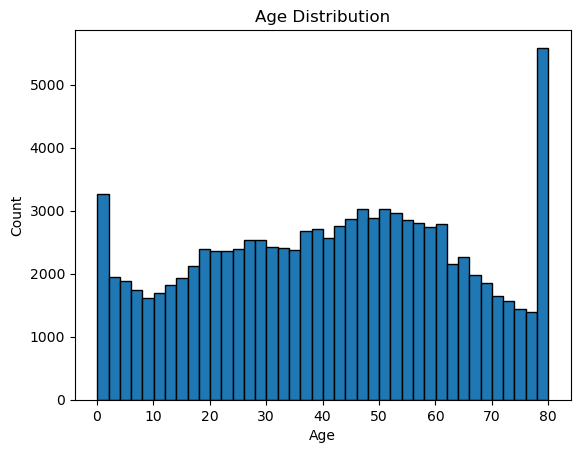

In [58]:
# Histogram for age
plt.hist(diabetes_data['age'], bins=40, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

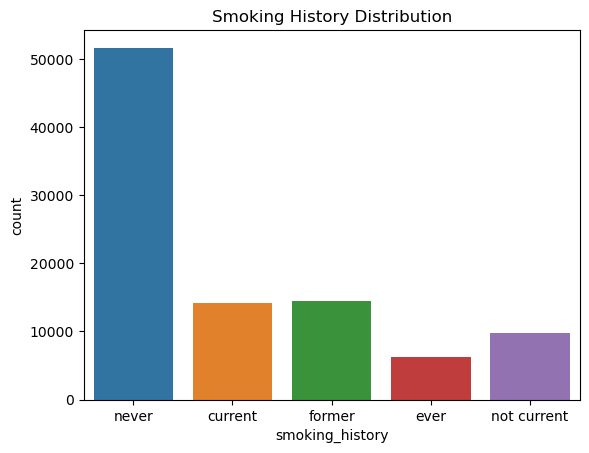

In [59]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=diabetes_data,)
plt.title('Smoking History Distribution')
plt.show()

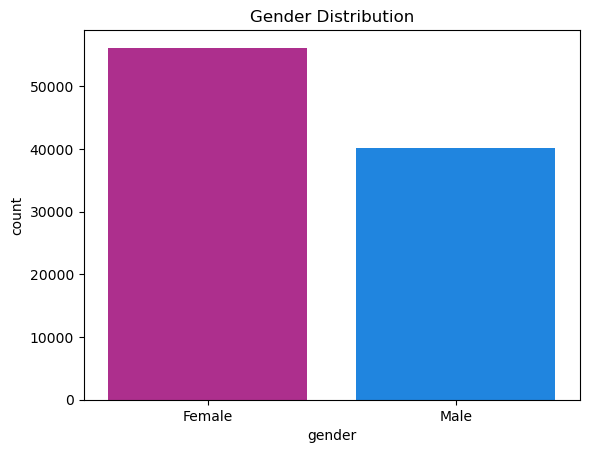

In [60]:
# Bar plot for gender
custom_colors = ["#C21A97", "#0087FF"]
sns.countplot(x='gender', data=diabetes_data, palette=custom_colors)
plt.title('Gender Distribution')
plt.show()

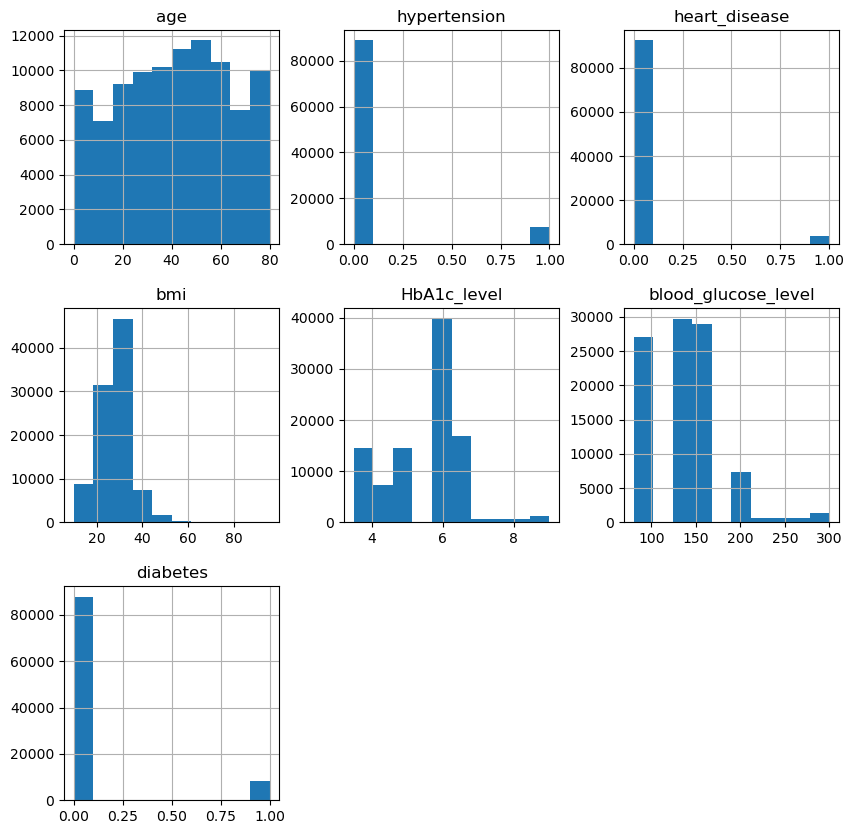

In [61]:
diabetes_data.hist(figsize = (10,10))
plt.show()

### Correlations between Different Factors and Diabetes

#### Correlation between Age and Diabetes

<Figure size 1000x500 with 0 Axes>

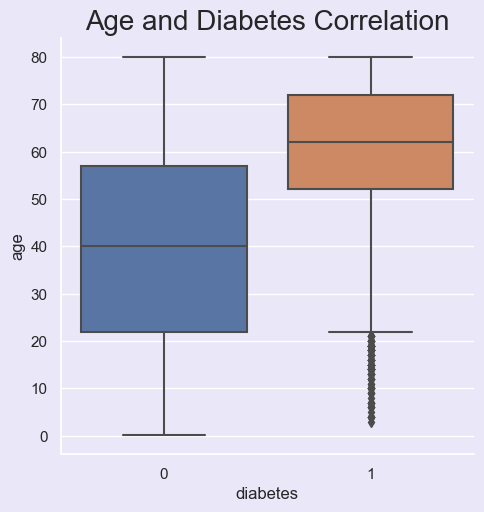

In [62]:
plt.figure(figsize=[10, 5])
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="diabetes",y="age", data=diabetes_data, kind='box')
plt.title("Age and Diabetes Correlation", size=20, y=1.0);
plt.show()

#### Correlation between Glucose and Diabetes

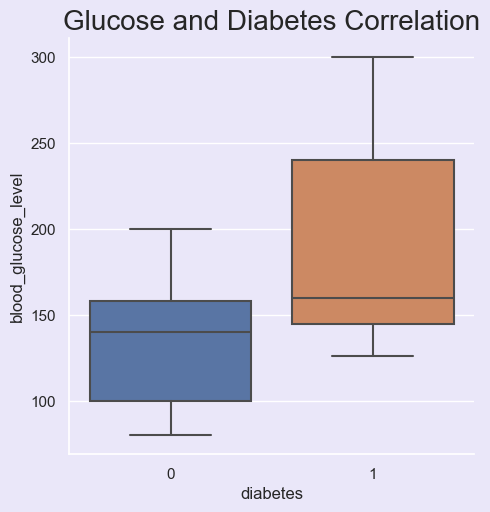

In [63]:
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="diabetes",y="blood_glucose_level", data=diabetes_data, kind='box')
plt.title("Glucose and Diabetes Correlation", size=20, y=1.0);

#### Correlation between Age, Gender and Diabetes

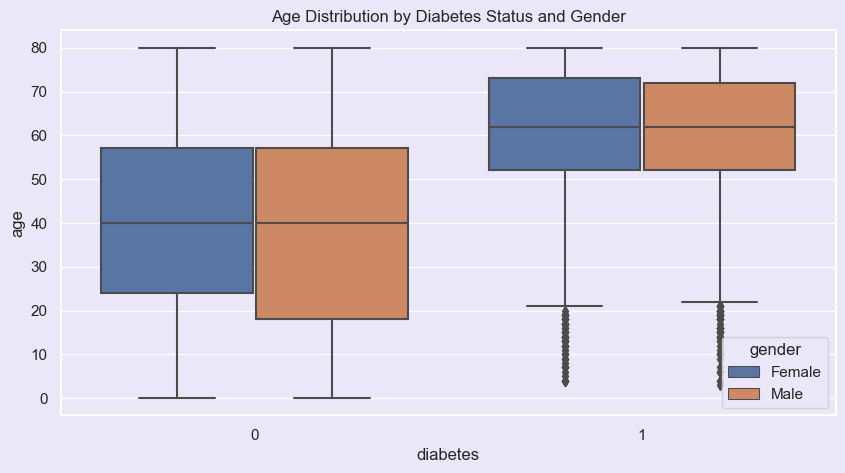

In [64]:
# Interaction between gender, Age and diabetes
plt.figure(figsize=[10, 5])
sns.boxplot(x='diabetes', y='age', hue='gender', data=diabetes_data)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

### Scatterplot Age vs BMI colored by Diabetes classification

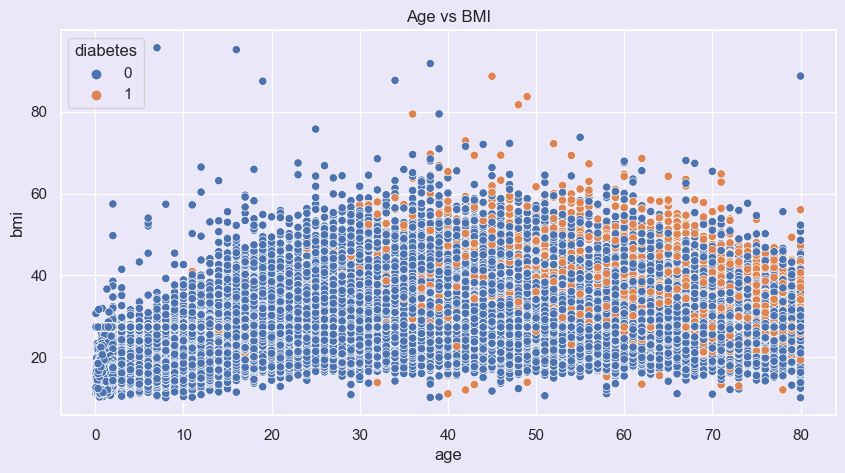

In [65]:
# Scatterplot Age vs BMI colored by Diabetes classification
plt.figure(figsize=[10.0,5])
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=diabetes_data)
plt.title('Age vs BMI')
plt.show()

### Heat Plots

#### Remapping string dtype to float

In [66]:
# Take a copy of dataset
data = diabetes_data.copy()

# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(data['smoking_history'].value_counts())

smoking_history
non-smoker     51687
past_smoker    30465
current        14172
Name: count, dtype: int64


#### Encoding

In [67]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

#### Correlation Heat Map

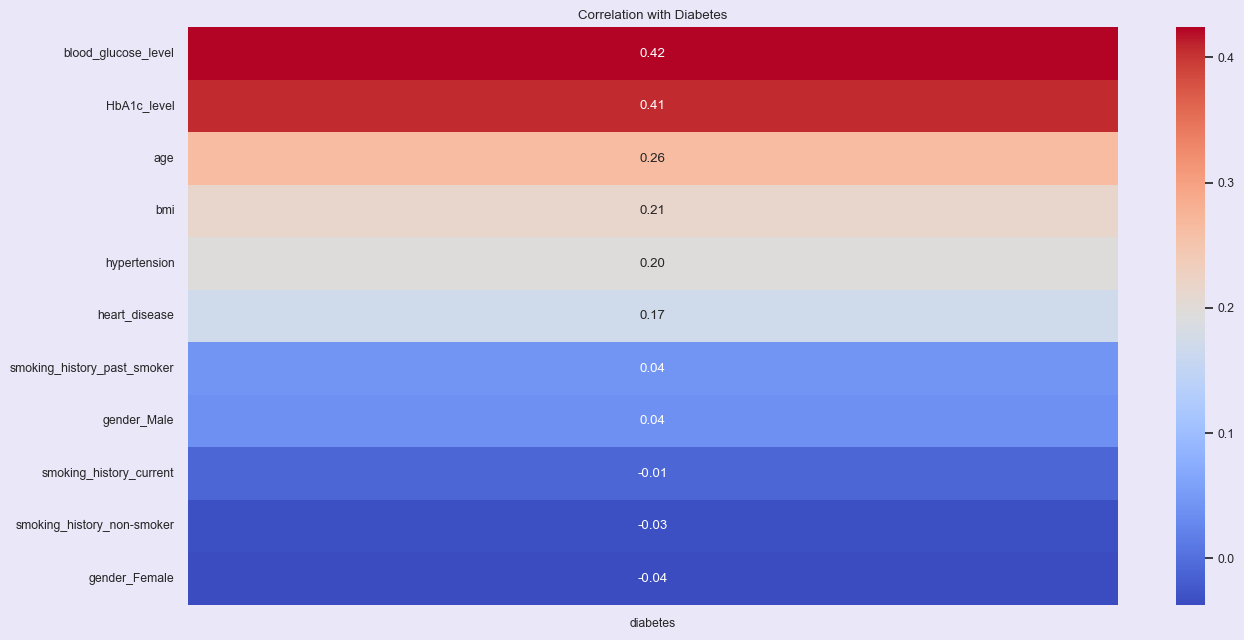

In [68]:
#Graph I
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)
plt.figure(figsize=[15.0,7.5])
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

### Correlation HeatMap

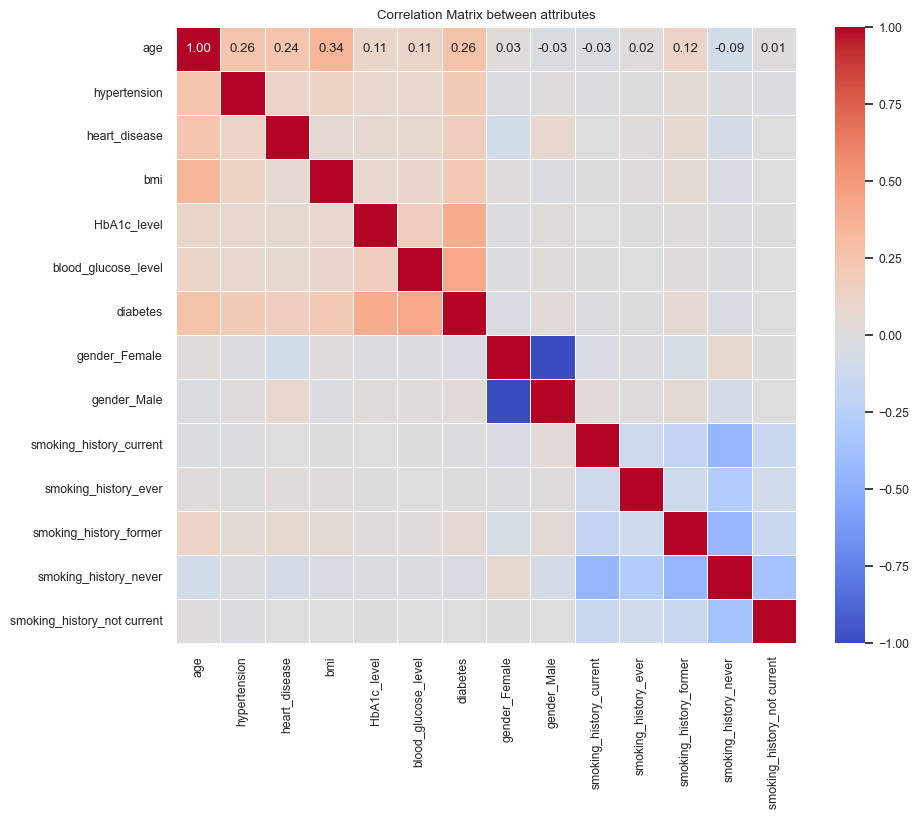

In [69]:
# Correlation Matrix
data_encoded = pd.get_dummies(diabetes_data)
corr_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
sns.set_style("white")
plt.title('Correlation Matrix between attributes')
plt.show()



### BOX plot of Age and Diabetes


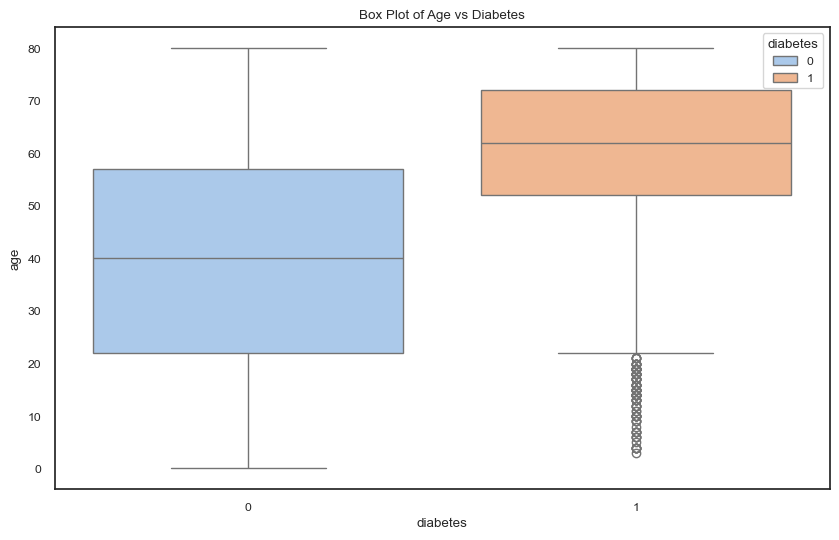

In [177]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='age', data=diabetes_data, palette='pastel' , hue='diabetes' , legend=True)
sns.set_style("white")
plt.title('Box Plot of Age vs Diabetes')
plt.show()


### Pie Chart

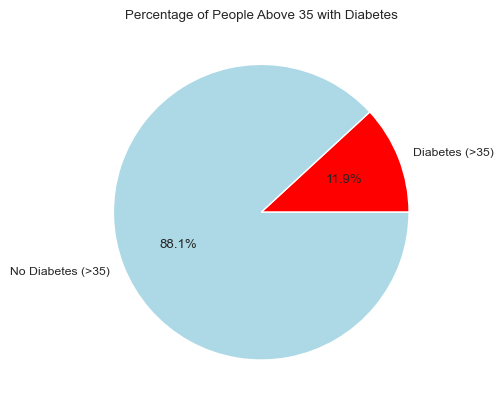

In [178]:
# Filter the data
filtered_data = diabetes_data[diabetes_data['age'] > 25]

# Calculate percentage
total_above_35 = len(filtered_data)
diabetes_above_35 = len(filtered_data[filtered_data['diabetes'] == 1])
percentage = (diabetes_above_35 / total_above_35) * 100

# Create a pie chart
labels = ['Diabetes (>35)', 'No Diabetes (>35)']
sizes = [diabetes_above_35, total_above_35 - diabetes_above_35]

# Specify colors for each section
colors = ['red', 'lightblue']  # Replace with your desired colors


plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of People Above 35 with Diabetes')
plt.show()
